# Preliminary EDA for Capstone - Recipe Recommendation System - Dataset from Food.com

# Table of Contents
  - [Introduction](#introduction)
    - [Dataset](#dataset)
    - [Goals](#goals)
  - [EDA](#eda)
  - [Findings](#findings)
  - [Concerns / Questions](#concerns-/-questions)


## Introduction

### Dataset


In this notebook, we will be conducting an EDA for the data set downloaded from https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews. (This has Id = 7 in my [Datasets Shortlist](https://docs.google.com/spreadsheets/d/1ldHpPRw_h2igZUgrDVV3-4N8vYuZXxyOC60sUJlbb7E/))

The downloaded folder contains 4 files:  
- recipes.csv
- reviews.csv
- recipes.parquet
- reviews.parquet 

Kaggle.com has the following information on the dataset:

*The recipes dataset contains 522,517 recipes from 312 different categories. This dataset provides information about each recipe like cooking times, servings, ingredients, nutrition, instructions, and more.*
*The reviews dataset contains 1,401,982 reviews from 271,907 different users. This dataset provides information about the author, rating, review text, and more.*

*Content*
*The recipes dataset is provided in two different formats:*

*recipes.parquet and reviews.parquet are recommended as they preserve the schema of the original data.*
*recipes.csv is designed to be parsed in R while reviews.csv does not contain any list-columns so it can be easily parsed.*

### Goals

1. I intend to use Python and Pandas for my capstone, so we will investigate what R specific things are there in this dataset and see whether we can still use it with Pandas.
2. Find out whether the dataset contains the following things:
    1. Ingredient lists
    2. Calorie info / Nutrition info
    3. Serving size
    4. Ratings
    5. Recipe steps / instructions
    6. Quantity of each ingredient
3. See cleanliness of data in terms of missing values.
4. Check the distribution of relevant variables.
5. Create a data dictionary. [TODO]

## EDA

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f"pandas version: {pd.__version__}"

'pandas version: 2.1.4'

In [3]:
# Read recipes.csv into a DataFrame
df_recipes = pd.read_csv('data/recipes.csv')
df_recipes.shape

(522517, 28)

The recipes DataFrame contains 522517 rows and 28 columns.

In [4]:
df_recipes.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

Column names:  
      ['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions']

The following colums look relevant, we will keep an eye on them as we investigate further:

'RecipeIngredientQuantities',  
'RecipeIngredientParts',  
'RecipeServings',  
'RecipeInstructions',  
'AggregatedRating',  
'ReviewCount',  
'Calories' and 8 different nutritional information.


In [5]:
# Sample 1 row from the dataset
df_recipes.sample(1).T

,31913
RecipeId,35547
Name,Spinach/Strawberry Salad
AuthorId,27416
AuthorName,William Uncle Bill
CookTime,PT7M
PrepTime,PT15M
TotalTime,PT22M
DatePublished,2002-07-29T19:44:00Z
Description,"An absolutely delightful and tasty salad, espe..."
Images,"c(""https://img.sndimg.com/food/image/upload/w_..."


In [7]:
# Check the number of unique values for the columns
df_recipes.nunique()

RecipeId                      522517
Name                          438188
AuthorId                       57178
AuthorName                     56793
CookTime                         490
PrepTime                         318
TotalTime                       1240
DatePublished                 245540
Description                   492838
Images                        165889
RecipeCategory                   311
Keywords                      216569
RecipeIngredientQuantities    459571
RecipeIngredientParts         497120
AggregatedRating                   9
ReviewCount                      420
Calories                       30138
FatContent                      4523
SaturatedFatContent             2533
CholesterolContent              9803
SodiumContent                  40455
CarbohydrateContent             8102
FiberContent                    1067
SugarContent                    6008
ProteinContent                  2581
RecipeServings                   171
RecipeYield                    34043
R

**Note** Looking at the number of unique values per column, we can see that `AggregatedRating` has 9 unique values over the dataset.

Let's look at some recipes in detail to see how the values look.

In [8]:
# See the various categories
df_recipes["RecipeCategory"].unique()

array(['Frozen Desserts', 'Chicken Breast', 'Beverages', 'Soy/Tofu',
       'Vegetable', 'Pie', 'Chicken', 'Dessert', 'Southwestern U.S.',
       'Sauces', 'Stew', 'Black Beans', '< 60 Mins', 'Lactose Free',
       'Weeknight', 'Yeast Breads', 'Whole Chicken', 'High Protein',
       'Cheesecake', 'Free Of...', 'High In...', 'Brazilian', 'Breakfast',
       'Breads', 'Bar Cookie', 'Brown Rice', 'Oranges', 'Pork',
       'Low Protein', 'Asian', 'Potato', 'Cheese', 'Halibut', 'Meat',
       'Lamb/Sheep', 'Very Low Carbs', 'Spaghetti', 'Scones',
       'Drop Cookies', 'Lunch/Snacks', 'Beans', 'Punch Beverage',
       'Pineapple', 'Low Cholesterol', '< 30 Mins', 'Quick Breads',
       'Sourdough Breads', 'Curries', 'Chicken Livers', 'Coconut',
       'Savory Pies', 'Poultry', 'Steak', 'Healthy', 'Lobster', 'Rice',
       'Apple', 'Broil/Grill', 'Spreads', 'Crab', 'Jellies', 'Pears',
       'Chowders', 'Cauliflower', 'Candy', 'Chutneys', 'White Rice',
       'Tex Mex', 'Bass', 'German', 'Fru

In [ ]:
sel = df_recipes['RecipeCategory'] == 'Chicken'
df_recipes.loc[sel,:]

In [ ]:
# chicken lasagna recipe id 112, gluten free chicken nuggets - 541328
condition = df_recipes['RecipeId'] == 112
df_recipes.loc[condition,:].T

In [ ]:
# In ingredient quantities, there is no unit of ingredient
df_recipes.loc[condition,['Description','RecipeIngredientQuantities','RecipeIngredientParts','RecipeInstructions']].values

In [ ]:
# how about GF chicken nuggets
condition = df_recipes['RecipeId'] == 541328
df_recipes.loc[condition,['Description','RecipeIngredientQuantities','RecipeIngredientParts','RecipeInstructions']].values

array([['Make and share this Gluten Free Chicken Nuggets recipe from Food.com.',  
        'c("2", "2", "1/2", "1", "1", "1/2", "1/4", "1/2")',  
        'c("boneless skinless chicken", "onion powder", "garlic powder", "salt", "pepper", "mayonnaise")',  
        'c("Preheat oven to 400°.", "Cut chicken in nugget sized pieces.", "Add all dry ingredients into a large Ziploc bag and crush until smooth.", "Place mayonnaise (egg wash   could be used here as well) in a bowl.", "Dredge chicken through the mayonnaise until thinly coated and place into Ziploc.", "Shake coating over chicken and place on a   parchment lined cookie sheet.", "Bake until cooked through and golden brown, around 20 minutes.")']],  
      dtype=object)

In [12]:
df_recipes.loc[condition,:].values

array([[541328, 'Gluten Free Chicken Nuggets', 37092, 'Jenny', 'PT20M',
        'PT10M', 'PT30M', '2020-12-07T19:03:00Z',
        'Make and share this Gluten Free Chicken Nuggets recipe from Food.com.',
        '"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/submissions/recipe/37092/HuafE1TnThqvJZN7xapK_114059F9-A4B2-45DF-A7AE-FE402E6F17DE.jpeg"',
        'Chicken',
        'c("Poultry", "Meat", "Kid Friendly", "Free Of...", "< 30 Mins", "Easy")',
        'c("2", "2", "1/2", "1", "1", "1/2", "1/4", "1/2")',
        'c("boneless skinless chicken", "onion powder", "garlic powder", "salt", "pepper", "mayonnaise")',
        nan, nan, 399.9, 15.0, 2.3, 145.6, 686.8, 13.8, 1.3, 0.1, 50.2,
        4.0, nan,
        'c("Preheat oven to 400°.", "Cut chicken in nugget sized pieces.", "Add all dry ingredients into a large Ziploc bag and crush until smooth.", "Place mayonnaise (egg wash could be used here as well) in a bowl.", "Dredge chicken through the may

**Note** 
`Description` contains superficial information and is not a necessary column for me.  
`RecipeIngredientQuantities` - does not have units of measurement in it, and it is not present in any other column.


Let's check for duplicates

In [ ]:
# check for duplicates
df_recipes.duplicated().sum()  # no duplicate rows

There are no duplicate rows in the dataset.

Let's check for missing values

In [13]:
df_recipes.isna().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

Our columns of interest have many missing values, let's check the percentage of missing values.

In [14]:
# Percentage of missing values in each column
(df_recipes.isna().sum()/df_recipes.shape[0]*100.0).sort_values(ascending=False)

RecipeYield                   66.614292
AggregatedRating              48.462155
ReviewCount                   47.364775
RecipeServings                35.005751
CookTime                      15.797572
Keywords                       3.298840
RecipeCategory                 0.143727
Description                    0.000957
RecipeIngredientQuantities     0.000574
Images                         0.000191
SaturatedFatContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
CarbohydrateContent            0.000000
SodiumContent                  0.000000
ProteinContent                 0.000000
CholesterolContent             0.000000
RecipeId                       0.000000
FatContent                     0.000000
Calories                       0.000000
Name                           0.000000
RecipeIngredientParts          0.000000
DatePublished                  0.000000
TotalTime                      0.000000
PrepTime                       0.000000


| Column Name      | % missing |
|------------------|-----------|
| AggregatedRating | 48.462155 |
| ReviewCount      | 47.364775 |
| RecipeServings   | 35.005751 |

We will drop these rows and see how many rows we are left with.

In [15]:
df_new = df_recipes.dropna(subset=['AggregatedRating','RecipeServings','RecipeIngredientQuantities'])

In [ ]:
df_new.shape

In [ ]:
(df_new.isna().sum()/df_new.shape[0]*100.0).sort_values(ascending=False)

**Note**  
After dropping rows that have null values for relevant columns, the number of rows reduced from 522,517 to 172,369

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172369 entries, 0 to 522431
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    172369 non-null  int64  
 1   Name                        172369 non-null  object 
 2   AuthorId                    172369 non-null  int64  
 3   AuthorName                  172369 non-null  object 
 4   CookTime                    145515 non-null  object 
 5   PrepTime                    172369 non-null  object 
 6   TotalTime                   172369 non-null  object 
 7   DatePublished               172369 non-null  object 
 8   Description                 172366 non-null  object 
 9   Images                      172368 non-null  object 
 10  RecipeCategory              172214 non-null  object 
 11  Keywords                    168216 non-null  object 
 12  RecipeIngredientQuantities  172369 non-null  object 
 13  RecipeIngredientPar

(array([1.0400e+03, 4.0000e+01, 1.3120e+03, 4.0900e+02, 0.0000e+00,
        5.9470e+03, 2.5290e+03, 2.8030e+04, 2.2202e+04, 1.1086e+05]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

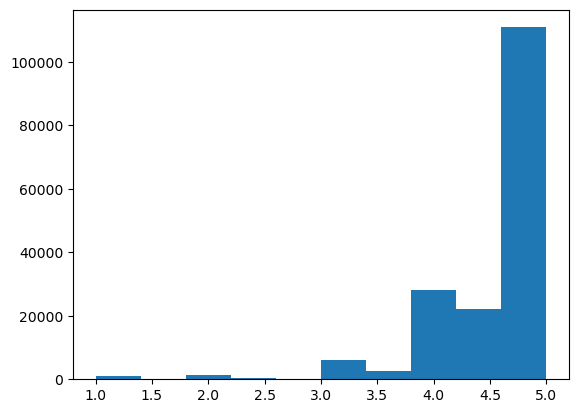

In [17]:
plt.hist(df_new.AggregatedRating)

In [18]:
max(df_new.ReviewCount.values)

3063.0

In [19]:
df_new.AggregatedRating.unique()

array([4.5, 3. , 1. , 5. , 4. , 2. , 3.5, 2.5, 1.5])

In [20]:
df_new.AggregatedRating.value_counts(normalize=True)

AggregatedRating
5.0    0.643155
4.0    0.162616
4.5    0.128805
3.0    0.034502
3.5    0.014672
2.0    0.007612
1.0    0.006034
2.5    0.002373
1.5    0.000232
Name: proportion, dtype: float64

**Note**  
64% of data set has 5.0 rating  
16% has 4.0 rating  
12% gas 4.5 rating  

92% of data has rating of 4.0 or more

In [21]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
RecipeId,172369.0,2.240727e+05,1.419172e+05,38.0,102122.0,211865.0,336011.0,5.412980e+05
AuthorId,172369.0,7.308521e+06,1.154312e+08,27.0,57828.0,185105.0,411832.0,2.002849e+09
AggregatedRating,172369.0,4.628257e+00,6.405929e-01,1.0,4.5,5.0,5.0,5.000000e+00
ReviewCount,172369.0,5.153705e+00,2.096123e+01,1.0,1.0,2.0,4.0,3.063000e+03
Calories,172369.0,3.559746e+02,4.165958e+02,0.0,165.1,285.7,448.6,4.177020e+04
FatContent,172369.0,1.786116e+01,2.860264e+01,0.0,5.3,12.3,23.1,4.701100e+03
SaturatedFatContent,172369.0,6.851934e+00,1.101927e+01,0.0,1.3,4.1,9.1,9.921000e+02
CholesterolContent,172369.0,6.987791e+01,1.086189e+02,0.0,4.3,41.2,97.0,1.182380e+04
SodiumContent,172369.0,5.656291e+02,2.669656e+03,0.0,122.1,325.9,687.4,7.041296e+05
CarbohydrateContent,172369.0,3.310239e+01,5.055882e+01,0.0,11.5,25.3,43.6,9.023800e+03


The dataset contains a reviews.csv also, but I don't think it will be used for my capstone because the recipes.csv has an aggregated rating and review count.  
Let's look at the reviews.csv to see whether it has any relevant information.

In [22]:
# Load the dataset
df_user = pd.read_csv("data/reviews.csv")
df_user.shape

(1401982, 8)

The reviews dataset has 1401982 rows and 8 columns.

In [23]:
df_user.columns

Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
       'DateSubmitted', 'DateModified'],
      dtype='object')

Columns:  

['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review', 'DateSubmitted', 'DateModified']

Let's check for missing values.

In [24]:
df_user.isna().sum()

ReviewId           0
RecipeId           0
AuthorId           0
AuthorName         0
Rating             0
Review           214
DateSubmitted      0
DateModified       0
dtype: int64

214 rows do not have a `Review`, but all rows have `Rating`

In [25]:
df_user.sample()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
711494,783716,54127,851405,Cooking Mom of 7,5,This is a great stock for us vegetarians or th...,2009-01-08T16:11:14Z,2009-01-08T16:11:14Z


At first glance this reviews.csv does not seem relevant to me, but we may revisit this decision later.

## Findings

1. This dataset is for R according to the description, so the column values with arrays in them have a c() in it. Depending on the approach we take to handling recipe ingredients, this may not be a blocker to using Pandas.
2. 92% of data has rating of 4.0 or more with the maximum rating being 5.0.
3. `AggregatedRating` has 9 unique values [4.5, 3. , 1. , 5. , 4. , 2. , 3.5, 2.5, 1.5])
4. `RecipeIngredientQuantities` - does not have units of measurement in it, and it is not present in any other column.
5. After dropping rows that have null values for relevant columns, the number of rows reduced from 522,517 to 172,369.
6. This is the only dataset I have found so far that has the serving size info in it.
7. Summary for relevant information.

|                               |     |
|-------------------------------|-----|
| Ingredient lists              | Yes |
| Calorie info / Nutrition info | Yes |
| Serving size                  | Yes |
| Ratings                       | Yes |
| Recipe steps / instructions   | Yes |
| Quantity of each ingredient   | No  |


## Concerns / Questions

1. Quantity of each ingredient is not present.
2. What are .parquet files? I am wondering whether it may have more information that could be relevant.